In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

with open('/content/drive/My Drive/ai_project/data/f10-7.pkl', 'rb') as f:
    df = pickle.load(f)

Mounted at /content/drive


In [5]:
n = 10
t_num = 50

In [6]:
X = np.array([df['value'].values[i:i+n] for i in range(len(df)-n)])
y = np.array([df['value'].values[i+n] for i in range(len(df)-n)])

In [7]:
len(X), len(y)

(25979, 25979)

In [8]:
X.shape, y.shape

((25979, 10), (25979,))

In [ ]:
X = X.reshape((X.shape[0], X.shape[1], 1))

In [ ]:
# X_test, y_test = X[-t_num:], y[-t_num:]

In [9]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN, LSTM, GRU

In [10]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X[:-t_num]), np.array(y[:-t_num]), test_size=0.2, random_state=42)

In [ ]:
# X_train.shape, X_val.shape, y_train.shape, y_val.shape

((20743, 10, 1), (5186, 10, 1), (20743,), (5186,))

In [11]:
def plot_result(his):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.plot(his.history['loss'])
    ax1.plot(his.history['val_loss'])
    ax1.set_title('Model Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'], loc='upper right')

    ax2.plot(his.history['mae'])
    ax2.plot(his.history['val_mae'])
    ax2.set_title('Model MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'], loc='upper right')

    plt.show()

In [ ]:
# def make_pred(num, model):
#     data_pred = np.array(df['value'].values[:-n])
#     for i in range(num):
#         temp = data_pred[-n:]
#         pred = model.predict(temp.reshape(1, -1))
#         data_pred = np.append(data_pred, pred)
#     return data_pred[-num:]

In [ ]:
model1 = Sequential()
# model1.add(LSTM(100, return_sequences=True, input_shape=[None, 1]))
# model1.add(LSTM(80, return_sequences=True))
# model1.add(LSTM(50))
model1.add(GRU(200, input_shape=[None, 1]))
model1.add(Dense(1))

model1.compile(loss='mse', optimizer='adam', metrics=['mae'])

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 200)               121800    
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 122001 (476.57 KB)
Trainable params: 122001 (476.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history1 = model1.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/50
649/649 [==============================] - 5s 5ms/step - loss: 7001.3047 - mae: 61.8922 - val_loss: 2666.3035 - val_mae: 30.5266
Epoch 2/50
649/649 [==============================] - 2s 4ms/step - loss: 1479.9539 - mae: 19.8365 - val_loss: 798.1556 - val_mae: 13.3851
Epoch 3/50
649/649 [==============================] - 2s 4ms/step - loss: 518.2460 - mae: 10.1774 - val_loss: 348.0173 - val_mae: 8.5624
Epoch 4/50
649/649 [==============================] - 3s 4ms/step - loss: 250.7713 - mae: 7.0459 - val_loss: 187.4483 - val_mae: 6.5144
Epoch 5/50
649/649 [==============================] - 3s 4ms/step - loss: 151.2621 - mae: 5.8025 - val_loss: 123.2268 - val_mae: 5.6705
Epoch 6/50
649/649 [==============================] - 3s 4ms/step - loss: 109.2746 - mae: 5.2538 - val_loss: 91.9788 - val_mae: 4.8376
Epoch 7/50
649/649 [==============================] - 3s 4ms/step - loss: 87.9171 - mae: 4.9497 - val_loss: 80.3330 - val_mae: 4.7346
Epoch 8/50
649/649 [=======================

In [ ]:
model1.save('/content/drive/My Drive/ai_project/model/LSTM4_2.keras')

In [13]:
model1 = keras.models.load_model('/content/drive/My Drive/ai_project/model/LSTM4_2.keras')

In [ ]:
def plot_result(his):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.plot(his.history['loss'])
    ax1.plot(his.history['val_loss'])
    ax1.set_title('Model Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'], loc='upper right')

    ax2.plot(his.history['mae'])
    ax2.plot(his.history['val_mae'])
    ax2.set_title('Model MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'], loc='upper right')

    plt.show()

def make_pred(num, model):
    data_pred = np.array(df['value'].values[:-t_num])
    for i in range(num):
        temp = data_pred[-n:]
        pred = model.predict(temp.reshape(1, -1), verbose=0)
        data_pred = np.append(data_pred, pred)
    return data_pred[-num:]

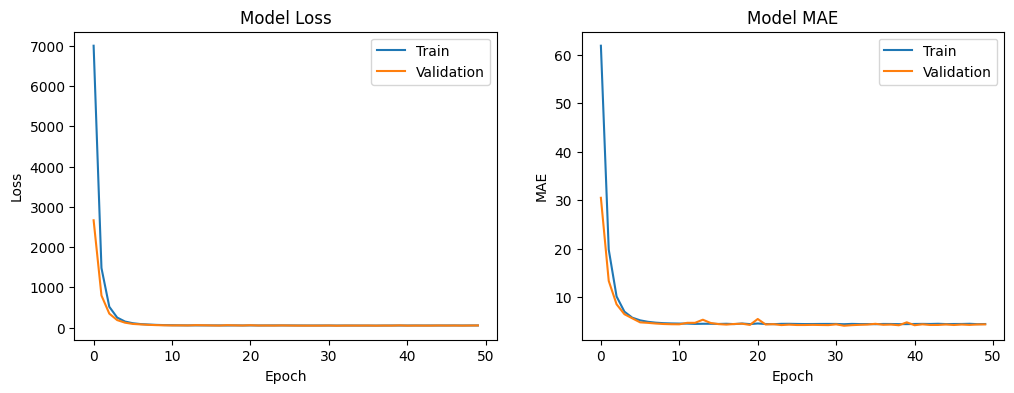

In [ ]:
plot_result(history1)

In [16]:
mse = tf.keras.losses.MeanSquaredError()
mae = tf.keras.losses.MeanAbsoluteError()

pred1 = model1.predict(X_test)
print(mse(pred1.flatten(), y_test.flatten()), mae(pred1.flatten(), y_test.flatten()))

163/163 [==============================] - 4s 2ms/step
tf.Tensor(54.14600794231699, shape=(), dtype=float64) tf.Tensor(4.423428387899971, shape=(), dtype=float64)


In [15]:
pred_num = 50
pred1 = make_pred(pred_num, model1)

NameError: ignored

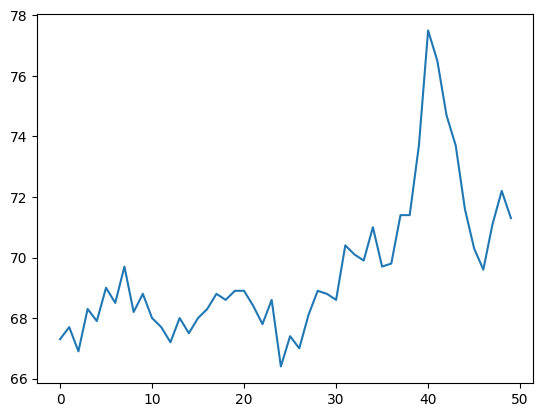

In [ ]:
plt.plot(y_test[:pred_num])

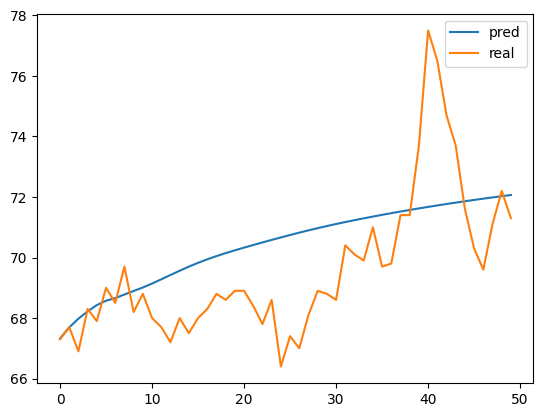

In [ ]:
plt.plot(pred1, label='pred')
plt.plot(y_test[:pred_num], label='real')
plt.legend()

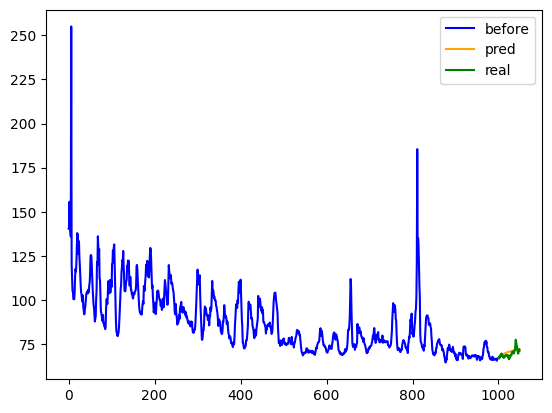

In [ ]:
left_num = 1000
plt.plot(df['value'].values[-left_num-t_num:-t_num], label='before', color='blue')
plt.plot(range(left_num, left_num+pred_num), pred1, label='pred', color='orange')
plt.plot(range(left_num, left_num+pred_num), y_test, label='real', color='green')
plt.legend()

In [ ]:
# data_pred = np.array(df['value'].values[:-t_num])
pred_weird = []
for i in range(pred_num):
    temp = df['value'].values[-n-t_num+i:-t_num+i]
    pred = model1.predict(temp.reshape(1, -1), verbose=0)
    pred_weird.append(pred[0])
pred_weird

[array([67.32404], dtype=float32),
 array([67.66905], dtype=float32),
 array([67.99009], dtype=float32),
 array([67.22883], dtype=float32),
 array([68.63047], dtype=float32),
 array([68.039345], dtype=float32),
 array([69.17812], dtype=float32),
 array([68.56787], dtype=float32),
 array([69.88223], dtype=float32),
 array([68.23188], dtype=float32),
 array([69.03198], dtype=float32),
 array([68.15536], dtype=float32),
 array([67.98421], dtype=float32),
 array([67.61387], dtype=float32),
 array([68.406525], dtype=float32),
 array([67.920425], dtype=float32),
 array([68.450226], dtype=float32),
 array([68.69535], dtype=float32),
 array([69.09574], dtype=float32),
 array([68.85099], dtype=float32),
 array([69.11646], dtype=float32),
 array([69.03591], dtype=float32),
 array([68.5524], dtype=float32),
 array([68.07341], dtype=float32),
 array([68.87017], dtype=float32),
 array([66.8623], dtype=float32),
 array([67.963806], dtype=float32),
 array([67.49718], dtype=float32),
 array([68.58395]

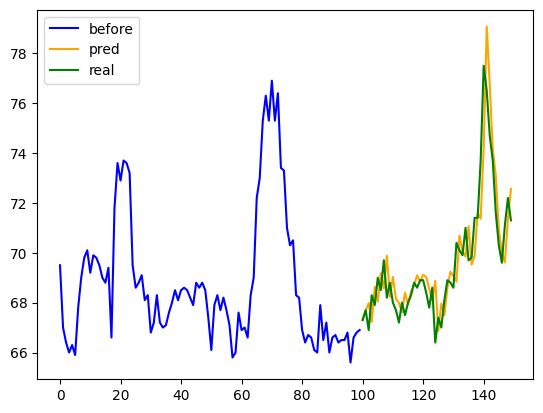

In [ ]:
left_num = 100
plt.plot(df['value'].values[-left_num-t_num:-t_num], label='before', color='blue')
plt.plot(range(left_num, left_num+pred_num), pred_weird, label='pred', color='orange')
plt.plot(range(left_num, left_num+pred_num), y_test, label='real', color='green')
plt.legend()

In [ ]:
data_pred_2 = np.array(df['value'].values[:-t_num-100])
for i in range(pred_num+100):
    temp = data_pred_2[-n:]
    pred = model1.predict(temp.reshape(1, -1), verbose=0)
    data_pred_2 = np.append(data_pred_2, pred[0])
pred2 = data_pred_2[-pred_num-100:]

In [ ]:
pred2

array([69.17279816, 69.61566162, 69.84265137, 69.95768738, 70.01708221,
       70.01641083, 69.99776459, 69.99137115, 69.97264862, 69.94969177,
       69.94996643, 69.95684052, 69.96365356, 69.96871185, 69.97190857,
       69.9733963 , 69.97386932, 69.97393036, 69.97364044, 69.97322845,
       69.97305298, 69.97307587, 69.97320557, 69.9733429 , 69.97345734,
       69.97353363, 69.97357941, 69.97359467, 69.97360229, 69.97360229,
       69.97360229, 69.97360229, 69.97360229, 69.97360229, 69.97360229,
       69.97360229, 69.97360229, 69.97360229, 69.97360229, 69.97360229,
       69.97360229, 69.97360229, 69.97360229, 69.97360229, 69.97360229,
       69.97360229, 69.97360229, 69.97360229, 69.97360229, 69.97360229,
       69.97360229, 69.97360229, 69.97360229, 69.97360229, 69.97360229,
       69.97360229, 69.97360229, 69.97360229, 69.97360229, 69.97360229,
       69.97360229, 69.97360229, 69.97360229, 69.97360229, 69.97360229,
       69.97360229, 69.97360229, 69.97360229, 69.97360229, 69.97

In [ ]:
y_test[-t_num-100:]

array([67.3, 67.7, 66.9, 68.3, 67.9, 69. , 68.5, 69.7, 68.2, 68.8, 68. ,
       67.7, 67.2, 68. , 67.5, 68. , 68.3, 68.8, 68.6, 68.9, 68.9, 68.4,
       67.8, 68.6, 66.4, 67.4, 67. , 68.1, 68.9, 68.8, 68.6, 70.4, 70.1,
       69.9, 71. , 69.7, 69.8, 71.4, 71.4, 73.7, 77.5, 76.5, 74.7, 73.7,
       71.6, 70.3, 69.6, 71.1, 72.2, 71.3])

In [ ]:
pred_x = model1.predict(X_test[-1])
pred_x

1/1 [==============================] - 0s 20ms/step


array([[242.71307],
       [243.73857],
       [243.4786 ],
       [242.993  ],
       [242.71307],
       [242.10022],
       [241.70312],
       [241.4834 ],
       [241.94916],
       [242.27885]], dtype=float32)

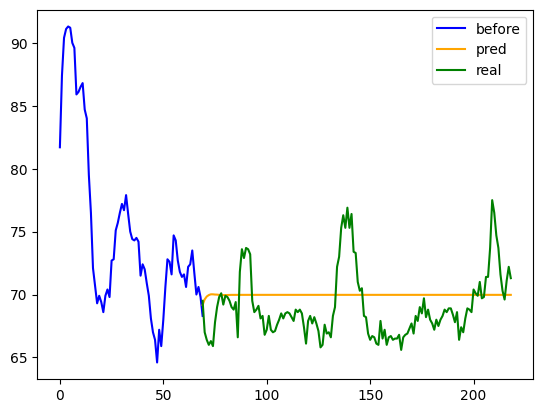

In [ ]:
t_num2 = t_num + 100
left_num = 70
plt.plot(df['value'].values[-left_num-t_num2:-t_num2], label='before', color='blue')
plt.plot(range(left_num-1, left_num+pred_num+100-1), pred2, label='pred', color='orange')
plt.plot(range(left_num-1, left_num+pred_num+100-1), y[-t_num2:], label='real', color='green')
plt.legend()

In [ ]:
pred_weird2 = []
for i in range(pred_num+100):
    temp = df['value'].values[-n-t_num2+i:-t_num2+i]
    pred = model1.predict(temp.reshape(1, -1), verbose=0)
    pred_weird2.append(pred[0])
pred_weird2

[array([69.1728], dtype=float32),
 array([69.78174], dtype=float32),
 array([68.62668], dtype=float32),
 array([68.4314], dtype=float32),
 array([68.289085], dtype=float32),
 array([68.3709], dtype=float32),
 array([68.19041], dtype=float32),
 array([68.98304], dtype=float32),
 array([69.501854], dtype=float32),
 array([69.876236], dtype=float32),
 array([70.02203], dtype=float32),
 array([69.513794], dtype=float32),
 array([69.89082], dtype=float32),
 array([69.81967], dtype=float32),
 array([69.6666], dtype=float32),
 array([69.423874], dtype=float32),
 array([69.36448], dtype=float32),
 array([69.68655], dtype=float32),
 array([68.41625], dtype=float32),
 array([71.10129], dtype=float32),
 array([72.1481], dtype=float32),
 array([71.60669], dtype=float32),
 array([72.17642], dtype=float32),
 array([72.07457], dtype=float32),
 array([71.79878], dtype=float32),
 array([69.63383], dtype=float32),
 array([69.275734], dtype=float32),
 array([69.380356], dtype=float32),
 array([69.59442],

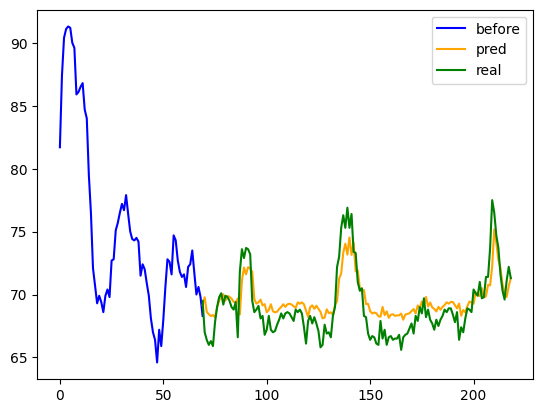

In [ ]:
left_num = 70
plt.plot(df['value'].values[-left_num-t_num2:-t_num2], label='before', color='blue')
plt.plot(range(left_num-1, left_num+pred_num+100-1), pred_weird2, label='pred', color='orange')
plt.plot(range(left_num-1, left_num+pred_num+100-1), y[-t_num2:], label='real', color='green')
plt.legend()